<h1><center> Google Search Analysis Using Python </center></h1>

## importing necessary libraies ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pytrends.request import TrendReq
trends = TrendReq()

# import numpy as np
# import seaborn as sns
# import cv2
# import plotly.express as px

now we creating a dataframe of top 40 countries which search for 'amazon' on google

In [2]:
trends.build_payload(kw_list=["amazon"])
data= trends.interest_by_region()
data = data.sort_values (by="amazon", ascending=False)
data = data.head(30)
print(data)

                      amazon
geoName                     
Italy                    100
Germany                  100
Austria                   96
Spain                     93
United Kingdom            93
United States             76
France                    61
Canada                    58
Ireland                   47
India                     42
Japan                     36
United Arab Emirates      36
Dominican Republic        33
Mexico                    30
Belgium                   28
Ecuador                   22
Venezuela                 19
Portugal                  17
Switzerland               15
Singapore                 15
Australia                 15
Israel                    14
Colombia                  12
Brazil                    12
Pakistan                  11
Chile                     11
Netherlands                9
Saudi Arabia               9
Peru                       9
South Africa               7


here 100 indicates the county with most search and 0 indicates least search or not enough data




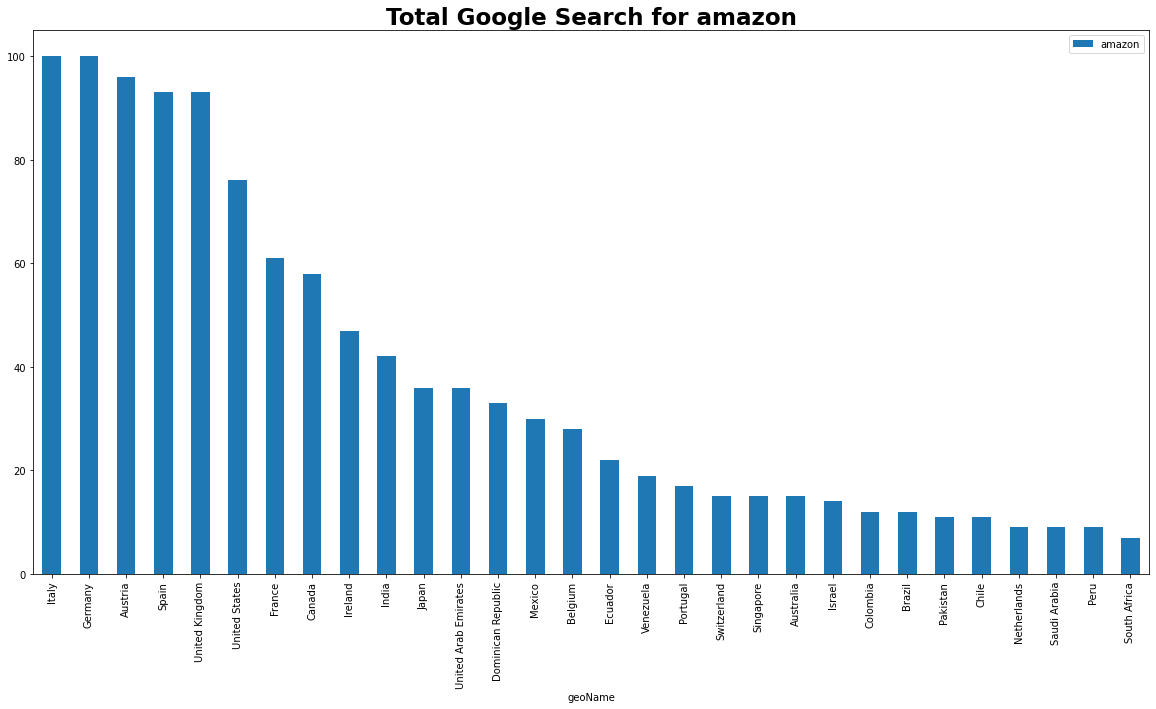

In [3]:
A = data.reset_index()
A.plot(x="geoName",y="amazon",figsize=(20,10),kind="bar")
plt.style.use('fivethirtyeight')
plt.rc('font',size=16)
plt.title('Total Google Search for amazon',fontweight='bold')
plt.show()

According to Above BarChart results,we can easily able to say that search query based on "amazon" are mostly done in Germany,Italy,Austria,Spain and United Kingdom.

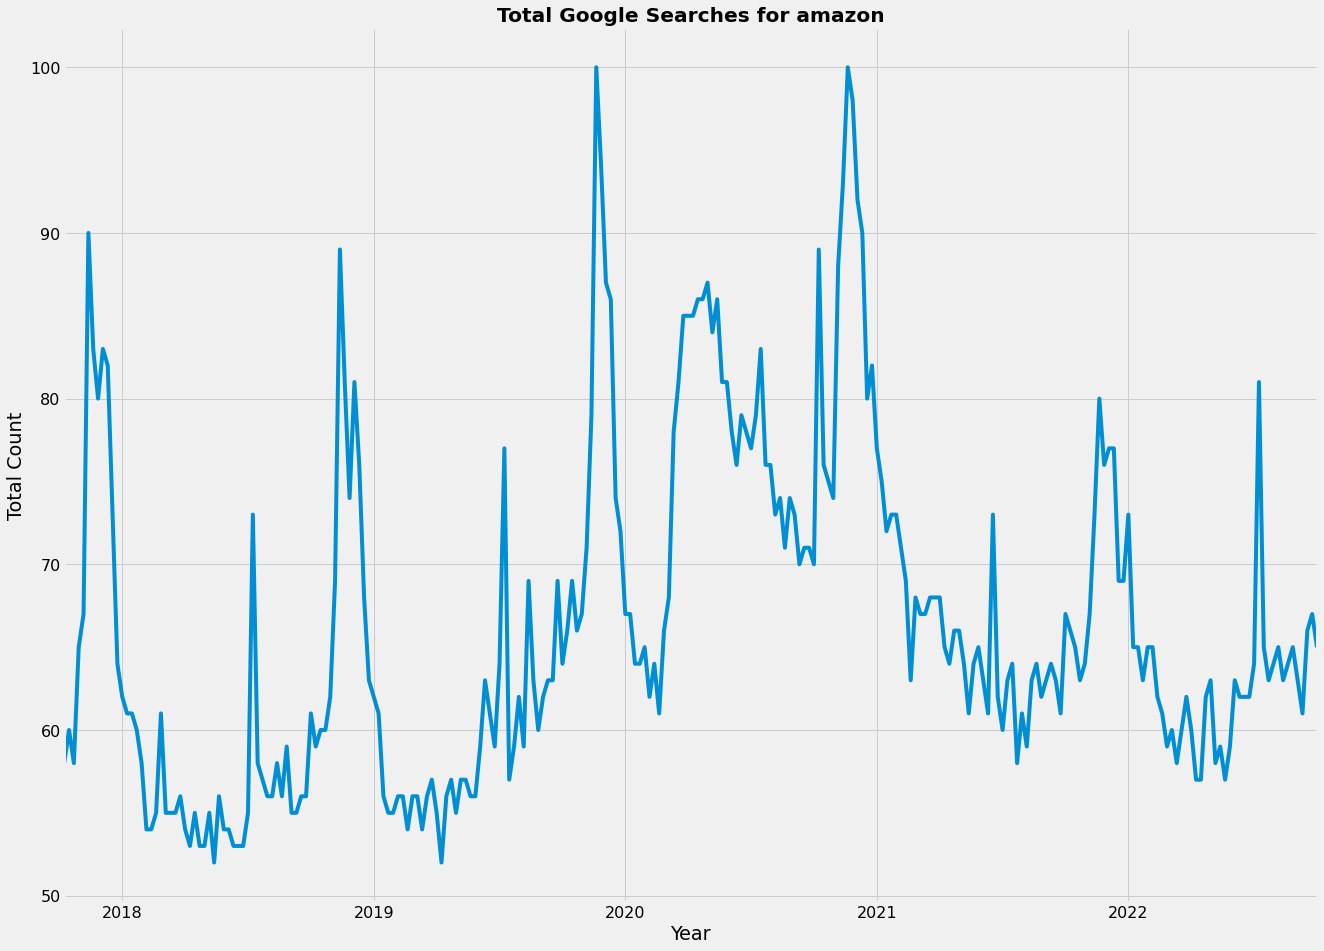

In [4]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['amazon'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(20, 15)) 
data['amazon'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for amazon', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

So as we all know that amazon has been the focus of so many countries for last few years,so this is a trend of searches to see how the total search queries based on amazon increase or ddecrease yearly on Google

### if we want to compare more than one keyword than it is also posssibe ( limit of keywods is 5 ) ###

In [6]:
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']
trends.build_payload(kw_list=kw_list)
data= trends.interest_by_region()
data = data.sort_values(by=kw_list, ascending=False)
data = data.head(10)
print(data)

              Facebook  Apple  Amazon  Netflix  Google
geoName                                               
Argentina           68      1       1        8      22
Peru                65      0       2        6      27
Ecuador             63      1       4        5      27
South Africa        62      3       2        6      27
Poland              58      1       1        6      34
Turkey              56      4       2        6      32
Portugal            54      2       4        5      35
Colombia            54      1       3        9      33
Mexico              50      2       7        7      34
Egypt               48      1       3        1      47


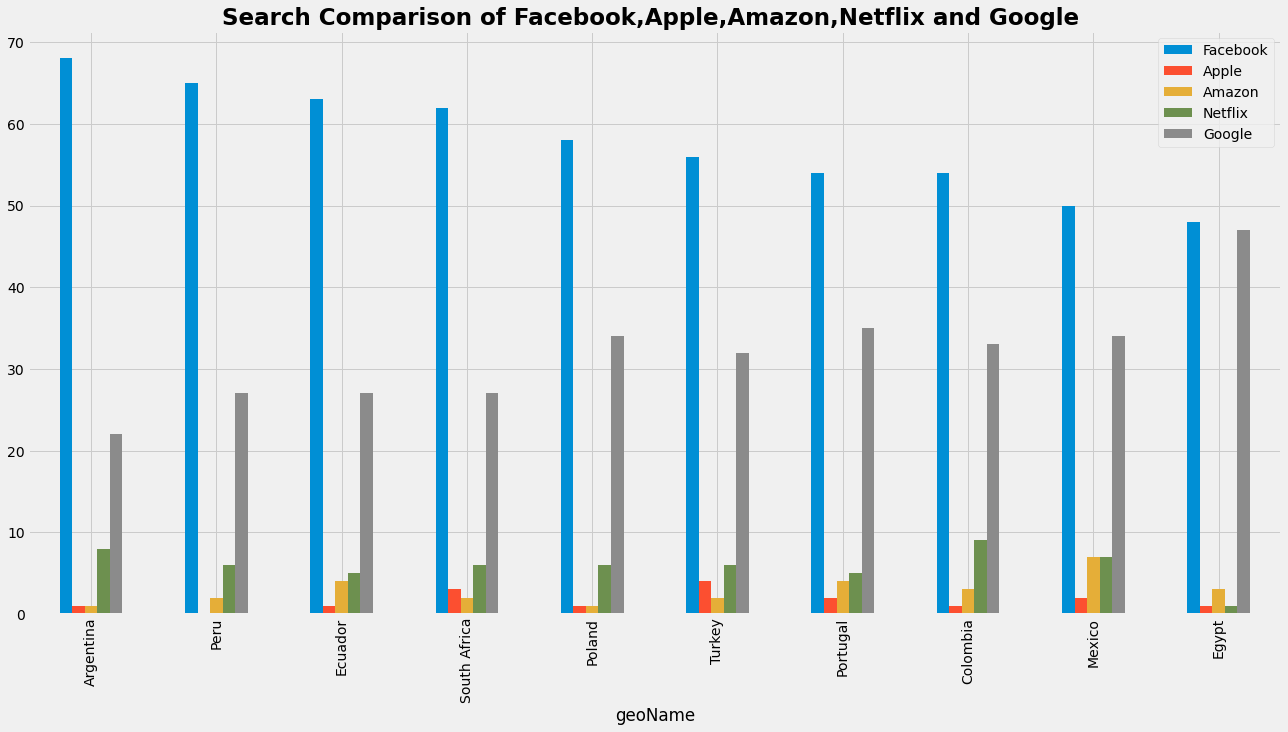

In [7]:
data.reset_index().plot(x="geoName",y=kw_list,figsize=(20,10),kind="bar")
plt.style.use('fivethirtyeight')
plt.rc('font',size=16)
plt.title('Search Comparison of Facebook,Apple,Amazon,Netflix and Google ',fontweight='bold')
plt.show()

### trending_searches attribute of pytrend is usefull for find trending search queries in particular country ###

In [8]:
data = TrendReq(hl='en-US', tz=360)
data = data.trending_searches(pn='india')
data

,0
0,Milad un Nabi 2022
1,Extreme Rules 2022
2,Man City vs Southampton
3,SSC
4,Reims vs PSG
5,Chelsea vs Wolves
6,Ssc.nic
7,David Miller
8,Getafe vs Real Madrid
9,Eid milad un nabi


trending searches in time for India

###  realtime_trending_searches() Attribute is usefull for finding  real time trending search queries in particular country ###

In [9]:
data = TrendReq(hl='en-US', tz=360)
data = data.realtime_trending_searches(pn='IN')
# data.to_string() # for print complete data
data.head(30)

,title,entityNames
0,"Valmiki, Ramayana, Pargat Diwas, Maharishi, Rama","[Valmiki, Ramayana, Pargat Diwas, Maharishi, R..."
1,"Sharad Purnima, 2022","[Sharad Purnima, 2022]"
2,"Puja, Lakshmi Puja, Durga","[Puja, Lakshmi Puja, Durga]"
3,"Sharad Purnima, Puja, Hinduism, Ashvin","[Sharad Purnima, Puja, Hinduism, Ashvin]"
4,"Pakistan national cricket team, Cricket, Women...","[Pakistan national cricket team, Cricket, Wome..."
5,"Odisha, Gajalakshmi, Sharad Purnima, Lakshmi P...","[Odisha, Gajalakshmi, Sharad Purnima, Lakshmi ..."
6,"Mawlid, Eritrea, Eid al-Fitr, Islam","[Mawlid, Eritrea, Eid al-Fitr, Islam]"
7,"Kheer, Sharad Purnima, Milk","[Kheer, Sharad Purnima, Milk]"
8,"Wellington Phoenix FC, A-League Men, Adelaide ...","[Wellington Phoenix FC, A-League Men, Adelaide..."
9,"Finn Bálor, Edge, WWE Extreme Rules, Paul Mich...","[Finn Bálor, Edge, WWE Extreme Rules, Paul Mic..."


####  finding A suggestions for autoCompletion of keyword "amazon" . it Returns the results from the “Add a search term” input box in the google trends UI. ####

In [10]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Hitesh Vaghela')
df = pd.DataFrame(keywords)
df.head(5)

""


### Top Trending Charts According to Year 2021 ###

In [11]:
df = pytrend.top_charts(2021, hl='en-US', tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


# Hitesh R Vaghela #

complete code Available on GitHub - https://github.com/hitesh-vaghela-2706/Google-search-analysis

In [14]:
df = pytrend.categories()
df

{'children': [{'children': [{'name': 'Celebrities & Entertainment News',
     'id': 184},
    {'children': [{'name': 'Animated Films', 'id': 1104},
      {'name': 'Anime & Manga', 'id': 317},
      {'name': 'Cartoons', 'id': 319},
      {'name': 'Comics', 'id': 318}],
     'name': 'Comics & Animation',
     'id': 316},
    {'children': [{'children': [{'name': 'Film & TV Awards', 'id': 1108},
        {'name': 'Film & TV Production', 'id': 1117}],
       'name': 'Film & TV Industry',
       'id': 1116},
      {'children': [{'name': 'Music Awards', 'id': 1113},
        {'name': 'Record Labels', 'id': 1114}],
       'name': 'Recording Industry',
       'id': 1115}],
     'name': 'Entertainment Industry',
     'id': 612},
    {'children': [{'name': 'Clubs & Nightlife', 'id': 188},
      {'name': 'Concerts & Music Festivals', 'id': 891},
      {'name': 'Film Festivals', 'id': 1086},
      {'name': 'Live Sporting Events', 'id': 1273},
      {'name': 'Movie Listings & Theater Showtimes', 'id':

In [16]:

df = pytrend.related_queries()
df

{}

In [18]:
df = pytrend.related_topics()
df

{}